In [1]:
import pandas as pd
import numpy as np
from math import isnan
from matplotlib import pyplot as plt
import requests
# matplotlib default param
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


print('import successful')

import successful


In [2]:
covid_vaccines = pd.read_csv('country_vaccinations.csv')

In [3]:
# Gets all the vaccines administered for a specific year
year = 2020
date_range = {}
usa_vaccines = covid_vaccines[covid_vaccines.country == 'United States']
for i in range(len(usa_vaccines.date)):
    if str(year) in str(usa_vaccines.iloc[i].date):
        date_range[usa_vaccines.iloc[i].date] = usa_vaccines.iloc[i].total_vaccinations
        if isnan(date_range[usa_vaccines.iloc[i].date]):
            del date_range[usa_vaccines.iloc[i].date]
date_range

{'12/20/2020': 556208.0,
 '12/21/2020': 614117.0,
 '12/23/2020': 1008025.0,
 '12/26/2020': 1944585.0,
 '12/28/2020': 2127143.0,
 '12/30/2020': 2794588.0}

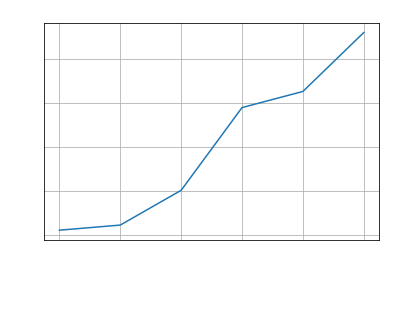

In [4]:
#covid_vaccines[covid_vaccines.country == 'United States']

plt.plot(date_range.keys(), date_range.values())
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
plt.grid()
plt.title("2020 Covid Vaccines")
plt.xlabel("Date")
plt.ylabel("Vaccines")
plt.show()

In [5]:
# Gets request from covidtracking.org
type = "daily"
data_set = requests.get("https://api.covidtracking.com/v2/us/daily.json")

data = data_set.json()
data

{'links': {'self': 'https://api.covidtracking.com/us/daily'},
 'meta': {'build_time': '2021-03-16T07:03:20.190Z',
  'license': 'CC-BY-4.0',
  'version': '2.0-beta',
  'field_definitions': [{'name': 'Total test results',
    'field': 'tests.pcr.total',
    'deprecated': False,
    'prior_names': ['totalTestResults']},
   {'name': 'Hospital discharges', 'deprecated': False, 'prior_names': []},
   {'name': 'Confirmed Cases',
    'field': 'cases.confirmed',
    'deprecated': False,
    'prior_names': ['positiveCasesViral']},
   {'name': 'Cumulative hospitalized/Ever hospitalized',
    'field': 'outcomes.hospitalized.total',
    'deprecated': False,
    'prior_names': ['hospitalizedCumulative']},
   {'name': 'Cumulative in ICU/Ever in ICU',
    'field': 'outcomes.hospitalized.in_icu',
    'deprecated': False,
    'prior_names': ['inIcuCumulative']},
   {'name': 'Cumulative on ventilator/Ever on ventilator',
    'field': 'hospitalization.on_ventilator.cumulative',
    'deprecated': False,
  

In [6]:
graphics = {}
for i in range(len(data['data'])):
    graphics[data['data'][i]['date']] = data['data'][i]['cases']['total']['value'] / 1000000
    print(f"{data['data'][i]['date']} Percent changed: {graphics[data['data'][i]['date']]}")

2021-03-07 Percent changed: 28.756184
2021-03-06 Percent changed: 28.714654
2021-03-05 Percent changed: 28.654639
2021-03-04 Percent changed: 28.585852
2021-03-03 Percent changed: 28.520365
2021-03-02 Percent changed: 28.453529
2021-03-01 Percent changed: 28.399281
2021-02-28 Percent changed: 28.351189
2021-02-27 Percent changed: 28.29684
2021-02-26 Percent changed: 28.225595
2021-02-25 Percent changed: 28.150738
2021-02-24 Percent changed: 28.075173
2021-02-23 Percent changed: 28.001915
2021-02-22 Percent changed: 27.93281
2021-02-21 Percent changed: 27.88028
2021-02-20 Percent changed: 27.821578
2021-02-19 Percent changed: 27.749224
2021-02-18 Percent changed: 27.674548
2021-02-17 Percent changed: 27.607724
2021-02-16 Percent changed: 27.540885
2021-02-15 Percent changed: 27.484573
2021-02-14 Percent changed: 27.429496
2021-02-13 Percent changed: 27.357332
2021-02-12 Percent changed: 27.26669
2021-02-11 Percent changed: 27.16566
2021-02-10 Percent changed: 27.063243
2021-02-09 Percen

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

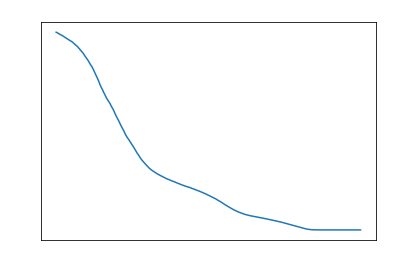

In [12]:
plt.plot(graphics.keys(), graphics.values())

plt.title('Total Infections (Millions)')
plt.xlabel('Date')
plt.ylabel('COVID Infections')
plt.show()

In [32]:
from collections import OrderedDict
infections = {}
for i in range(len(data['data'])):
    if "2020" in data['data'][i]['date'] and data['data'][i]['cases']['total']['value'] is not None:
        infections[data['data'][i]['date']] = data['data'][i]['cases']['total']['value'] / 1000000
        
res = OrderedDict(reversed(list(infections.items()))) 
res

OrderedDict([('2020-01-14', 0.0),
             ('2020-01-15', 0.0),
             ('2020-01-16', 0.0),
             ('2020-01-17', 0.0),
             ('2020-01-18', 0.0),
             ('2020-01-19', 1e-06),
             ('2020-01-20', 1e-06),
             ('2020-01-21', 2e-06),
             ('2020-01-22', 2e-06),
             ('2020-01-23', 2e-06),
             ('2020-01-24', 2e-06),
             ('2020-01-25', 2e-06),
             ('2020-01-26', 2e-06),
             ('2020-01-27', 2e-06),
             ('2020-01-28', 2e-06),
             ('2020-01-29', 2e-06),
             ('2020-01-30', 2e-06),
             ('2020-01-31', 2e-06),
             ('2020-02-01', 2e-06),
             ('2020-02-02', 2e-06),
             ('2020-02-03', 3e-06),
             ('2020-02-04', 3e-06),
             ('2020-02-05', 3e-06),
             ('2020-02-06', 5e-06),
             ('2020-02-07', 5e-06),
             ('2020-02-08', 5e-06),
             ('2020-02-09', 5e-06),
             ('2020-02-10', 5e-06),
  

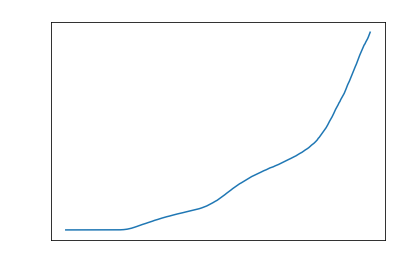

In [34]:
plt.plot(res.keys(), res.values())
plt.xlabel('Time')
plt.ylabel('COVID Infections (in millions)')
plt.title('COVID Infection Trends in 2020')
plt.show()